# Pandas

### Questions

- How can I work with tabular data of different data types?

### Objectives

- Load tabular data with Pandas to create a DataFrame.
- Learn how to select portions of data contained in a DataFrame.
- Do statistical analyses on data stored in a DataFrame.
- Plot data in a DataFrame using the Seaborn library.

### What is a DataFrame?

A DataFrame is like a spreadsheet with rows and columns representing observations and data fields, respectively.

Columns have labels, like the header row of a spreadsheet, and rows are indexed by number.

DataFrames are very powerful and great for data exploration and analysis.

A key difference between a NumPy array and a Pandas DataFrame is that a NumPy array contains values of only a single data type.

A Pandas DataFrame can have different data types in each of its columns.

Let's import the Pandas library using the customary alias:

```python
import pandas as pd
```

In [1]:
# Import pandas using an alias
import pandas as pd

We'll load in our fmri data using `pd.csv()`:

```python
fmri_data = pd.read_csv("new_fmri.csv")
```

We aren't using any of `pd.read_csv()`'s parameters now, but you will want to look into them for your own data.

In [2]:
# Load fmri data
fmri_data = pd.read_csv("new_fmri.csv")

### Looking at the data

We'll start by getting an idea of what our data looks like using some of the DataFrame's attributes and methods.

<!---
```python
# shape is an Attributes
# print out the dimensions
print("The shape of our data frame")
print(fmri_data.shape)

# head(), tail(), and describe() are methods
# print the first five rows
print("\n The head of our data frame \n")
print(fmri_data.head())

# print the last five rows
print("\n The tail of our data frame \n")
print(fmri_data.tail())

# print out summary statistics
print("\n A quick description of our data frame\n")
print(fmri_data.describe())

# columns and index are attributes
# get the column names
print("\nThe column names are \n")
print(fmri_data.columns)

# get the index values
print("\n The row indices are \n")
print(fmri_data.index)
# indices may or may not be as useful as column names, depending on the DataFrame
```
-->

In [3]:
# shape is an Attributes
# print out the dimensions
print(fmri_data)
print(fmri_data.shape)

     subject  timepoint event    region    signal  inc_signal
0        s13         18  stim  parietal -0.017552       -1.76
1         s5         14  stim  parietal -0.080883       -8.09
2        s12         18  stim  parietal -0.081033       -8.10
3        s11         18  stim  parietal -0.046134       -4.61
4        s10         18  stim  parietal -0.037970       -3.80
...      ...        ...   ...       ...       ...         ...
1059      s0          8   cue   frontal  0.018165        1.82
1060     s13          7   cue   frontal -0.029130       -2.91
1061     s12          7   cue   frontal -0.004939       -0.49
1062     s11          7   cue   frontal -0.025367       -2.54
1063      s0          0   cue  parietal -0.006899       -0.69

[1064 rows x 6 columns]
(1064, 6)


In [6]:
# head(), tail(), and describe() are methods
# print the first five rows

fmri_data.describe()

,timepoint,signal,inc_signal
count,1064.000000,1064.000000,1064.000000
mean,9.000000,0.003540,0.354051
std,5.479801,0.093930,9.392976
min,0.000000,-0.255486,-25.550000
25%,4.000000,-0.046070,-4.602500
50%,9.000000,-0.013653,-1.365000
75%,14.000000,0.024293,2.430000
max,18.000000,0.564985,56.500000


In [ ]:
# print the last five rows


In [ ]:
# print out summary statistics


In [10]:
# columns and index are attributes
# get the column names
print(fmri_data.columns)

Index(['subject', 'timepoint', 'event', 'region', 'signal', 'inc_signal'], dtype='object')


In [11]:
# get the index values
# indices may or may not be as useful as column names
# depending on the DataFrame

fmri_data.index

RangeIndex(start=0, stop=1064, step=1)

### Referencing columns

Pandas has two different ways to access data in a columns.

```python
fmri_data["subject"]
```

```python
fmri_data.subject
```

Both of these options are equivalent, but it is best to choose one and be consistent in your own code.

In [13]:
# Pull a single column from the dataset
fmri_data.subject

0       s13
1        s5
2       s12
3       s11
4       s10
       ... 
1059     s0
1060    s13
1061    s12
1062    s11
1063     s0
Name: subject, Length: 1064, dtype: object

Basic statistical operations can easily be done on a column:

<!---
print("Count:", fmri_data["subject"].count())  # number of values in the column
print("Max:", fmri_data["subject"].max())
print("Min:", fmri_data["subject"].min())
print("Std dev:", fmri_data["inc_signal"].std())
print("Mean:", fmri_data["inc_signal"].mean())
print("Sum:", fmri_data["inc_signal"].sum())
-->

### Indexing and slicing in DataFrames

We can use the indexing and slicing syntax we have seen with lists and NumPy arrays with our DataFrame, as well.

We can take the first five subjects' worth of data:

<!---
fmri_data[ :5]
-->

In [15]:
# Get the first five subjects
fmri_data[0:8]

,subject,timepoint,event,region,signal,inc_signal
0,s13,18,stim,parietal,-0.017552,-1.76
1,s5,14,stim,parietal,-0.080883,-8.09
2,s12,18,stim,parietal,-0.081033,-8.10
3,s11,18,stim,parietal,-0.046134,-4.61
4,s10,18,stim,parietal,-0.037970,-3.80
5,s9,18,stim,parietal,-0.103513,-10.35
6,s8,18,stim,parietal,-0.064408,-6.44
7,s7,18,stim,parietal,-0.060526,-6.05


Or the last five subjects' (remembering that negative indices start at the end, with `-1`):

<!---
fmri_data[-5: ]
-->

In [16]:
# Get the last five subjects
fmri_data[-5: ]

,subject,timepoint,event,region,signal,inc_signal
1059,s0,8,cue,frontal,0.018165,1.82
1060,s13,7,cue,frontal,-0.029130,-2.91
1061,s12,7,cue,frontal,-0.004939,-0.49
1062,s11,7,cue,frontal,-0.025367,-2.54
1063,s0,0,cue,parietal,-0.006899,-0.69


Or a random selection from the middle:

<!---
fmri_data[34:58]
-->

In [17]:
# Take a random slice
fmri_data[38:56]

,subject,timepoint,event,region,signal,inc_signal
38,s4,16,stim,parietal,-0.047433,-4.74
39,s3,16,stim,parietal,-0.071022,-7.10
40,s2,16,stim,parietal,-0.064998,-6.50
41,s1,16,stim,parietal,-0.061356,-6.14
42,s0,16,stim,parietal,-0.057715,-5.77
43,s13,15,stim,parietal,-0.010971,-1.10
44,s12,15,stim,parietal,-0.080698,-8.07
45,s11,15,stim,parietal,-0.072112,-7.21
46,s10,15,stim,parietal,-0.028809,-2.88
47,s9,15,stim,parietal,-0.134828,-13.48


Or even a selection based on a condition:

<!---
fmri_data[fmri_data['subject'] == 's3']
fmri_data[fmri_data['inc_signal'] > 5]
-->

In [18]:
# Use a conditional expression to select rows
fmri_data[fmri_data["inc_signal"] > 10]

,subject,timepoint,event,region,signal,inc_signal
36,s8,9,stim,parietal,0.170227,17.02
136,s3,9,stim,parietal,0.221716,22.17
140,s13,8,stim,parietal,0.130991,13.10
142,s11,8,stim,parietal,0.169673,16.97
143,s10,8,stim,parietal,0.136291,13.63
...,...,...,...,...,...,...
646,s4,4,cue,frontal,0.204171,20.42
649,s1,4,cue,frontal,0.112545,11.25
657,s4,5,cue,frontal,0.188521,18.85
753,s1,6,cue,parietal,0.181533,18.15


### Sorting data

We can sort values in our data frame on one or more columns.

<!---
fmri_data_idx.sort_values(['subject_id', 'timepoint', 'event', 'region'])
-->

In [21]:
# Sort the data
fmri_data.sort_values(['subject', 'timepoint', 'event', 'region'])

,subject,timepoint,event,region,signal,inc_signal
932,s0,0,cue,frontal,0.007766,0.78
1063,s0,0,cue,parietal,-0.006899,-0.69
67,s0,0,stim,frontal,-0.021452,-2.15
521,s0,0,stim,parietal,-0.039327,-3.93
624,s0,1,cue,frontal,0.016440,1.64
...,...,...,...,...,...,...
19,s9,17,stim,parietal,-0.121574,-12.16
722,s9,18,cue,frontal,-0.000643,-0.06
803,s9,18,cue,parietal,-0.051040,-5.10
519,s9,18,stim,frontal,-0.009959,-1.00


### Resetting the index

Let's reset our index using the method `set_index()` so that the indices correspond to the subjects of our data points.

To do this, we'll use a smaller DataFrame, `frontal` and create a copy called `frontal_idx`.

We could also reset the index in place, by setting the `set_index` parameter `inplace` to `True`.

<!---
frontal = pd.read_csv("frontal.csv")
frontal_idx = frontal.set_index("subject")

frontal_idx.index
-->

In [24]:
# Read in the small frontal.csv data set
# Reset the index and save the result in a copy of frontal
frontal = pd.read_csv("frontal.csv")
frontal_idx = frontal.set_index("subject")
frontal_idx

,timepoint,event,region,signal,inc_signal
subject,,,,,
s0,18,stim,frontal,-0.048430,-4.84
s1,18,stim,frontal,-0.035852,-3.59
s2,18,stim,frontal,-0.058471,-5.85
s3,18,stim,frontal,-0.010920,-1.09
s4,18,stim,frontal,-0.063263,-6.33
s5,18,stim,frontal,-0.031013,-3.10
s6,18,stim,frontal,0.046500,4.65
s7,18,stim,frontal,-0.019634,-1.96
s8,18,stim,frontal,-0.011114,-1.11


### Methods for subsetting DataFrames

Pandas has four methods for subsetting data in a DataFrame.

Two of them use a label-based selector. These are: `.loc()` and `.at()`. `.loc()` is used to select a range of rows or columns. `.at()` is used to select and single cell based on its row and column.

The other two methods use index numbers to select data. These are: `.iloc()` and `.iat()`. `.iloc()` selects a range of rows or columns. `.at()` selects a single cell based on its row and column.

<!---
frontal.loc[:5]
# frontal_idx.loc[:5]   doesn't work
frontal_idx.iloc[:5]
# frontal_idx.loc[3:8, "signal"]   doesn't work
# frontal_idx.iloc[3:8, "signal"]  doesn't work
frontal_idx.iloc[3:8]
frontal.at[0, 'subject']   # row label is an integer
frontal_idx.at['s0', 'inc_signal']
frontal.iat[2,3]
frontal_idx.iat[0,3]
-->

In [34]:
# Examples using .loc(), .at(), .iloc(), and .iat()

frontal_idx.iat[2, 3]


-0.058470978469199984

### Plotting with Pandas and Seaborn

We're now going to see how to create some plots with the Seaborn library, which is very well integrated with Pandas.

We will start by importing the Seaborn library, which comes with some example datasets. We'll load one of these, look at it, then plot the example plot.

<!---
# This line will load the seaborn library.
import seaborn as sns

# This line will load the mpg example dataset
mpg = sns.load_dataset("mpg")

# This fairly complicated line of code will produce
# a plot based on the mpt dataset. We will be able 
# to see the plot inside this notebook.

# Plot miles per gallon against horsepower with other semantics
fig = sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="rocket",
            height=5, data=mpg)
-->

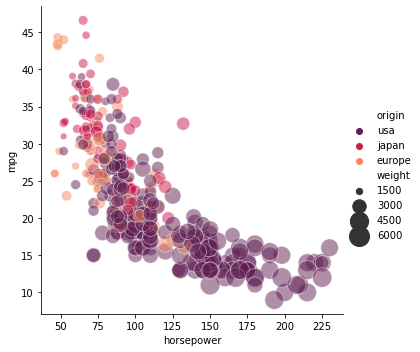

In [38]:
# This line will load the seaborn library.
import seaborn as sns

# This line will load the mpg example dataset
mpg = sns.load_dataset("mpg")

# This fairly complicated line of code will produce
# a plot based on the mpt dataset. We will be able 
# to see the plot inside this notebook.

# Plot miles per gallon against horsepower with other semantics
fig = sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="rocket",
            height=5, data=mpg)

### Let's plot some stuff

We will now use an FMRI dataset to make a few plots. We'll see how we can change what gets plotted by swapping arguments, and how to make different types of plots with the same data. This allows you to highlight different points.

<!---
import seaborn as sns
import pandas as pd

fmri_data = pd.read_csv("new_fmri.csv")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             palette="rocket", data=fmri_data)
-->

<!---
import seaborn as sns
sns.boxenplot(x="timepoint", y="signal",
              color="b", 
              scale="linear", data=fmri_data)
-->

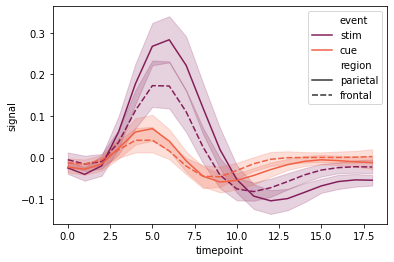

In [44]:
# Plot a line plot of the responses for different events and regions

import seaborn as sns

sns.lineplot(x="timepoint", y="signal", hue="event", style="region", palette="rocket", data=fmri_data)

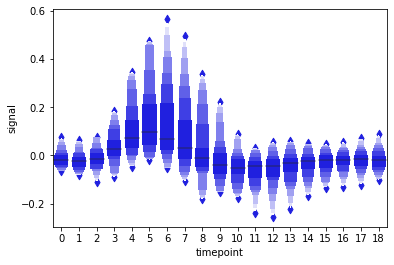

In [43]:
# Make a box plot of the variance between patients at each timepoint

sns.boxenplot(x="timepoint", y="signal", color="b", scale="linear", data=fmri_data)
